# IMPORT LIBRARY

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np


#Pemodelan
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


#Visualisasi
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# LOAD DATA

In [4]:
d_transaksi = pd.read_csv("/content/gdrive/MyDrive/Data Sheet/Case Study - Transaction.csv", delimiter=';')
d_transaksi.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [5]:
d_cs= pd.read_csv("/content/gdrive/MyDrive/Data Sheet/Case Study - Customer.csv", delimiter=";")
d_cs.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [6]:
d_produk = pd.read_csv("/content/gdrive/MyDrive/Data Sheet/Case Study - Product.csv", delimiter=";")
d_produk.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [7]:
d_store = pd.read_csv("/content/gdrive/MyDrive/Data Sheet/Case Study - Store.csv", delimiter=";")
d_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


#DATA CLEANSING

In [8]:
data_info = [d_transaksi, d_cs, d_produk, d_store]

for i in data_info:
  display(i.info())
  print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


None

In [9]:
d_transaksi['Date'] = pd.to_datetime(d_transaksi['Date'])
d_cs['Income'] = d_cs['Income'].str.replace(',', '').astype(int)

<ipython-input-9-754ed60cb205>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  d_transaksi['Date'] = pd.to_datetime(d_transaksi['Date'])


#DATA MERGE

In [10]:
merged_data = pd.merge(d_transaksi, d_cs, on='CustomerID')

In [11]:
merged_data = pd.merge(merged_data, d_produk, on='ProductID')

In [12]:
merged_data = pd.merge(merged_data, d_store, on='StoreID')

In [13]:
merged_data

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,1053,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,436,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,474,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,994,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR69555,221,2022-01-08,P4,12000,3,36000,4,23,1,Single,75,Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5016,TR21587,425,2022-10-17,P4,12000,1,12000,4,58,1,Married,722,Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5017,TR51183,409,2022-07-19,P4,12000,1,12000,4,47,0,Married,2823,Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5018,TR14963,374,2022-12-16,P4,12000,5,60000,4,32,0,Single,54,Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"


In [14]:
grouped_data = merged_data.groupby('Date')['Qty'].sum().reset_index()
grouped_data.head()

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67


In [15]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Qty     365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [16]:
# Memastikan tanggal dalam urutan waktu yang benar
grouped_data = grouped_data.sort_index()

# Menentukan frekuensi harian
grouped_data.index.freq = 'D'

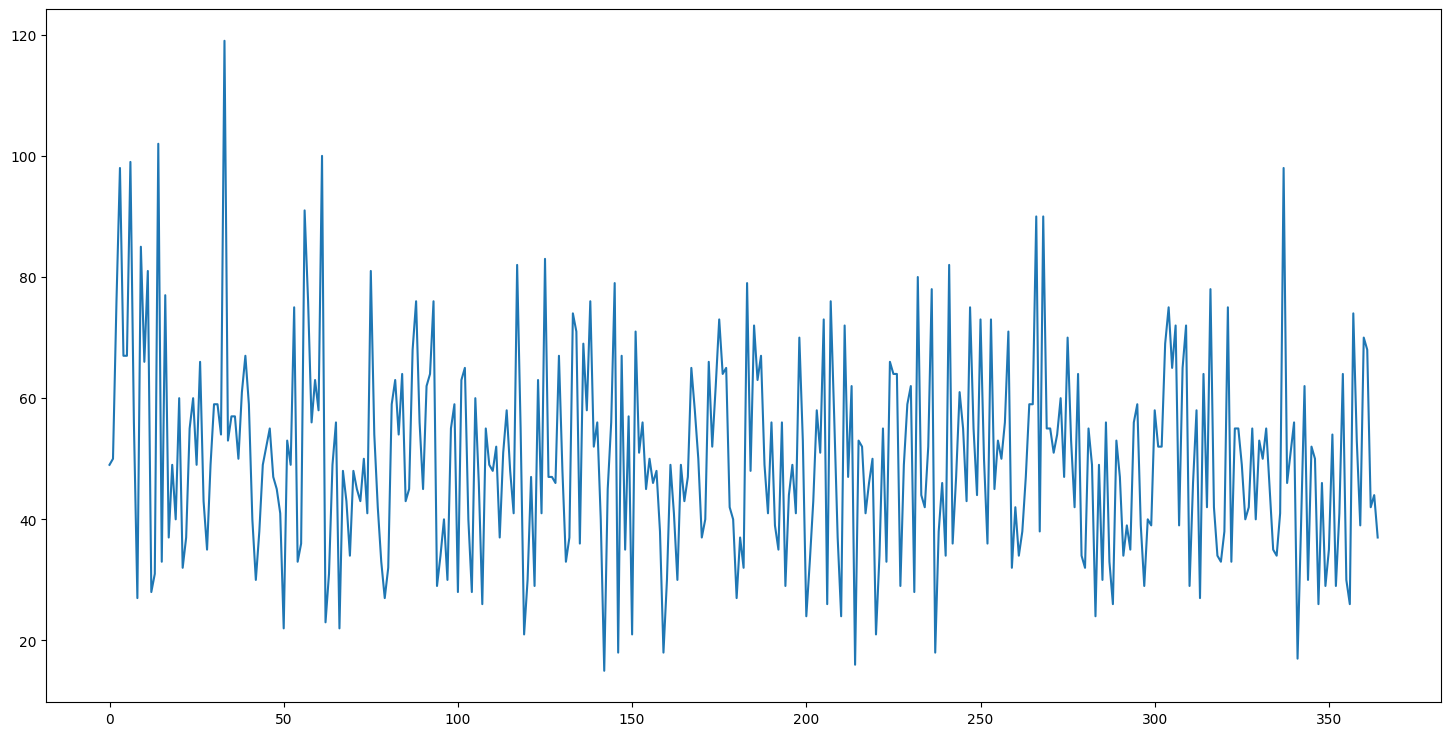

In [17]:
plt.figure(figsize=(18,9))
plt.plot(grouped_data.index, grouped_data["Qty"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Kuantitas')
plt.show();

# METODE TIME SERIES ARIMA

In [18]:
train_data = grouped_data[:len(grouped_data)-12]
test_data = grouped_data[len(grouped_data)-12:]

In [19]:
#train_ratio = 0.7
#test_ratio = 0.3

In [20]:
#split_index = int(len(grouped_data) * train_ratio)

In [21]:
#train_data = grouped_data[:split_index]
#test_data = grouped_data[split_index:]

In [22]:
arima_model = SARIMAX(train_data['Qty'], order = (1,1,1), seasonal_order = (4,0,3,7))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                         
=================================================================================================
Dep. Variable:                                       Qty   No. Observations:                  353
Model:             SARIMAX(1, 1, 1)x(4, 0, [1, 2, 3], 7)   Log Likelihood               -1485.182
Date:                                   Sun, 03 Sep 2023   AIC                           2990.364
Time:                                           09:37:04   BIC                           3029.000
Sample:                                                0   HQIC                          3005.739
                                                   - 353                                         
Covariance Type:                                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0034      0.055     -0.061      0.951      -0.111       0.105
ma.L1         -0.9807      0.015    -63.642      0.000      -1.011      -0.950
ar.S.L7       -0.3073      0.294     -1.047      0.295      -0.883       0.268
ar.S.L14       0.4040      0.257      1.571      0.116      -0.100       0.908
ar.S.L21       0.1949      0.270      0.721      0.471      -0.335       0.725
ar.S.L28       0.2093      0.060      3.505      0.000       0.092       0.326
ma.S.L7        0.2929      0.307      0.956      0.339      -0.308       0.894
ma.S.L14      -0.4797      0.263     -1.824      0.068      -0.995       0.036
ma.S.L21      -0.1861      0.275     -0.676      0.499      -0.726       0.353
sigma2       266.9393     20.480     13.034      0.000     226.799     307.080
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 7.06
Prob(Q):                              0.87   Prob(JB):                         0.03
Heteroskedasticity (H):               0.72   Skew:                             0.33
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
arima_pred = arima_result.predict(start = len(train_data), end = len(grouped_data)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


353    46.009025
354    46.638925
355    45.445890
356    50.123922
357    44.564810
358    52.109595
359    48.199317
360    48.190719
361    47.614686
362    45.452204
363    47.155771
364    47.226968
Name: ARIMA Predictions, dtype: float64

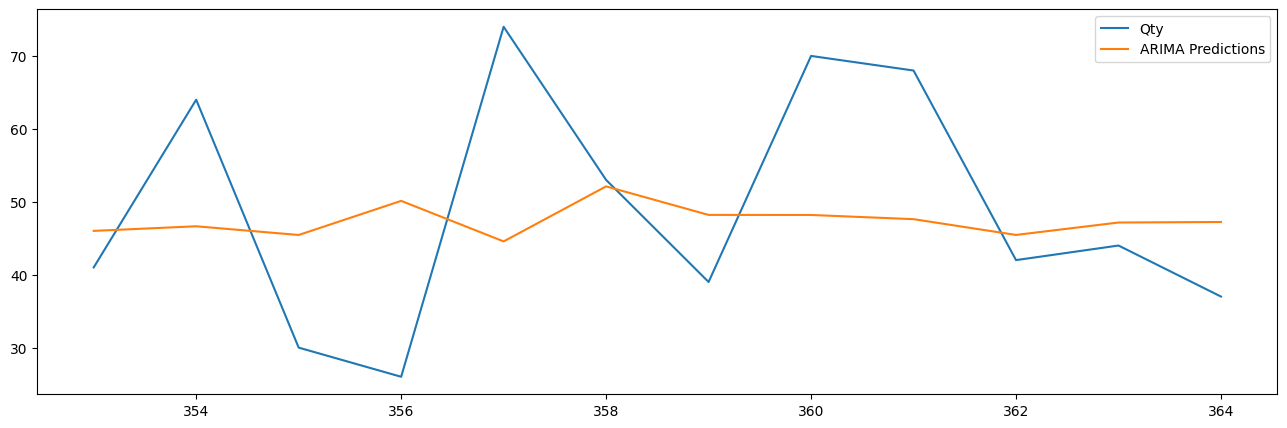

In [24]:
test_data['Qty'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [25]:
arima_rmse_error = rmse(test_data['Qty'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = grouped_data['Qty'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 259.7133592741482
RMSE Error: 16.115624693884758
Mean: 50.12602739726027


In [26]:
test_data['ARIMA_Predictions'] = arima_pred

<ipython-input-26-c6fe8541f169>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA_Predictions'] = arima_pred


In [27]:
test_data

,Date,Qty,ARIMA_Predictions
353,2022-12-20,41,46.009025
354,2022-12-21,64,46.638925
355,2022-12-22,30,45.445890
356,2022-12-23,26,50.123922
357,2022-12-24,74,44.564810
358,2022-12-25,53,52.109595
359,2022-12-26,39,48.199317
360,2022-12-27,70,48.190719
361,2022-12-28,68,47.614686
362,2022-12-29,42,45.452204


In [28]:
# Prediksi Kuantitas Harian
forecast_steps = 19  # Jumlah hari yang ingin diprediksi
forecast = arima_result.forecast(steps=forecast_steps)

In [33]:
# Tampilkan hasil prediksi
forecast= pd.DataFrame(forecast)

In [34]:
forecast["predicted_mean"] = forecast["predicted_mean"].astype(int)

In [35]:
forecast.tail(7)

,predicted_mean
365,55
366,48
367,47
368,47
369,41
370,46
371,48
